<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

In [414]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

The numpy library is used to handle matrixes.

Matplotlib to plot and handle the plots of the data.

ListedColormap is used for the boudary ploting.

In [415]:
microchips = np.genfromtxt('microchips.csv', delimiter=',')          # Read the microchips.csv file.

microchipsX1 = microchips[:,0]      # Save X1 values.
microchipsX2 = microchips[:,1]      # Save X2 values.
microchipsY = microchips[:,2]       # Save Y  values.

#print("X- values: ", microchipsX)                                       # Print Xs.
#print("Y-values: ", microchipsY)                                        # Prints Ys.

The needed datas are set here. 

The microchips.csv file is read using np.genfromtx.

Spilting up the as X1,X2-features and Y-labels.

<b> Exercise 4.1: Plot the data in X and y using different symbols or colors for the two different classes. </b>

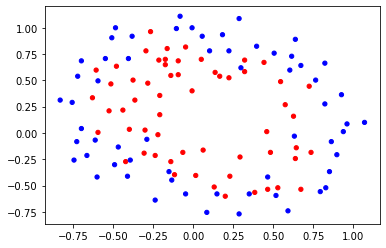

In [416]:
plt.scatter(microchipsX1, microchipsX2, c=microchipsY,cmap='bwr', s=18) # Scatter plot X1, X2 => Y.
plt.show()

<b> Exercise 4.2: Use gradient descent to find β in the case of a quadratic model. </b>

In [417]:
n = len(microchipsY)    # Number of avaialbe datas.
Xne = np.c_[np.ones((n, 1)), microchipsX1, microchipsX2, microchipsX1**2,microchipsX1*microchipsX2, microchipsX2**2] # Constructing Construct Xne = [1, X1n, X2n, X21n, X1nX2n, X2n2n]

N = 50000     # Set hyperparameters N.
alpha = 0.1    # Set hyperparameter aplha.
Bj = np.zeros(len(Xne[0]))  # Prepare Bj using  β = (0, 0, 0, 0, 0, 0).
costY = []  # Array holding cost for each iteration.


def g(x):   # Contruct with function g(M). Sigmoid function.
    return (np.exp(x)/(1 + np.exp(x)))

def gradientDescent(Xne, Y, Bj, N, alpha):
    for i in range(N):  # Compute N times.
        Bj = Bj - (np.dot(((alpha/n) * Xne.T), ((g(np.dot(Xne,Bj))) - Y))) # Compute gradient descent logisic regression  βj+1 = βj −(α/n)XT(g(Xβ) − y).
        cost = (-1/n) * (np.dot(Y.T, np.log(g(np.dot(Xne,Bj))))+np.dot((1-Y).T, np.log(1-g(np.dot(Xne,Bj)))))   # Calculate cost.
        costY.append(cost)  # Add cost to costY list.
    return Bj          # Return computed Bj.

Bgradient = gradientDescent(Xne, microchipsY, Bj, N, alpha)       # Recieve B, created using gradient descent.


Here gradient descent is runing using the model  Xne = [1, X1n, X2n, X21n, X1nX2n, X2n2n], and function g(M (Sigmoid function).

The gradient descent iterates for 10000 times with a rate of 0.01.

The cost function is also calculated and added in an array which will be used for the print.

<b> Print the hyper parameters α and Niter, and produce a 1×2 plot with: 

1) the cost function
J(β) as a function over iterations, 

2) the corresponding decision boundary (together with
the X, y scatter plot), and 

3) the number of training errors presented as a part of the
decision boundary plot title. </b>

50000
0.1


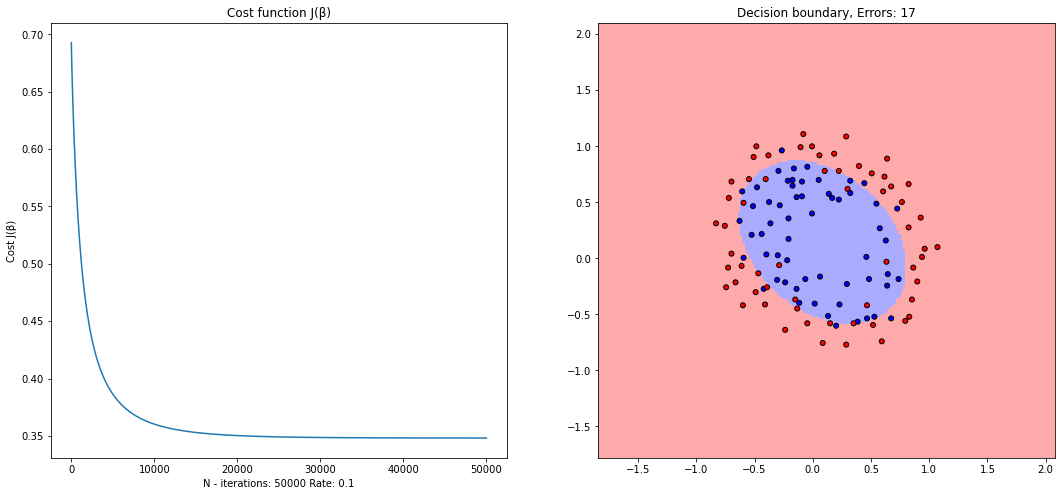

In [418]:

# Can also be used for createing Xne, based on lecture  5 slide 22.
def mapFeature(X1,X2,D): # Pyton
    one = np.ones([len(X1),1])
    Xe = np.c_[one,X1,X2] # Start with [1,X1,X2]
    for i in range(2,D+1):
        for j in range(0,i+1):
            Xnew = X1**(i-j)*X2**j # type (N)
            Xnew = Xnew.reshape(-1,1) # type (N,1) required by append
            Xe = np.append(Xe,Xnew,1) # axis = 1 ==> append column
    return Xe

# Used to print the results with model, gradient descent and classifier.
def printResults(D): 

    print(N)
    print(alpha)

    plt.figure(figsize=(18, 8))
    plt.subplot(1,2, 1)
    plt.plot(range(0, N ), costY)
    plt.xlabel('N - iterations: ' +str(N) +" Rate: " +str(alpha))
    plt.ylabel('Cost J(β)')
    plt.title("Cost function J(β)")


    #Plotting Boundaries can  be found at  lecture 5 slide 21.
    h = 0.02                                                                        # The size determines the granularity of the grid.
    x1_min, x1_max = microchipsX1.min()-1, microchipsX1.max()+1                     # Get the min and max x-value. 
    x2_min, x2_max = microchipsX2.min()-1, microchipsX2.max()+1                     # Get the min and max y-value.
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h)) # Mesh Grid.
    x1,x2 = xx.ravel(), yy.ravel()                                                  # Turn to two Nx1 arrays.
    XXe = mapFeature(x1,x2,D)                                                       # Extend matrix for degree 2.

    #  predict each mesh point
    p = g( np.dot(XXe, Bgradient) )                                                 # classify mesh ==> probabilities.
    classes = p>0.5                                                                 # round off probabilities.

    answer = g( np.dot(Xne, Bgradient) )                                            # Classify training data ==> probabilities.
    result = answer>0.5                                                                     


    errors = 0                                                                      # Variable holding errors.
    for i in range(len(result)):
        if result[i] != microchipsY[i]:
            errors += 1                                                             # Gets larger if error is found.


    clz_mesh = classes.reshape(xx.shape)                                            # return to mesh format

    # Create mesh plot color
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light,shading='auto')
    plt.scatter(microchipsX1, microchipsX2, c=microchipsY , marker=".",cmap=cmap_bold, s=100, edgecolor='k')
    plt.title("Decision boundary, Errors: " +str(errors)) # Title with corresponding training errors.
    plt.show()
    
printResults(2) # Run degree 2 model.

The cost function that was created with the gradient descent is here ploted.

Also the resulst of the mesh points are also ploted with a decision boundary.

The boundery implemtations is from lecture 5.

The hyper parameters used here are N = 50000 and Rate 0.1.

The errors are counted and printed on the on the plot.


<b> Exercise 4.3: Implement a method called mapFeatures. </b>

In [419]:
# Can also be used for createing Xne, based on lecture  5 slide 22.
def mapFeature(X1,X2,D): # Pyton
    one = np.ones([len(X1),1])
    Xe = np.c_[one,X1,X2] # Start with [1,X1,X2]
    for i in range(2,D+1):
        for j in range(0,i+1):
            Xnew = X1**(i-j)*X2**j # type (N)
            Xnew = Xnew.reshape(-1,1) # type (N,1) required by append
            Xe = np.append(Xe,Xnew,1) # axis = 1 ==> append column
    return Xe

mapFeatures is here implemented *again* for the exercise.

<b> Exercise 4.4: Use mapFeatures to repeat 2) but with a polynomial of degree five (d = 5) model. </b>

50000
0.1


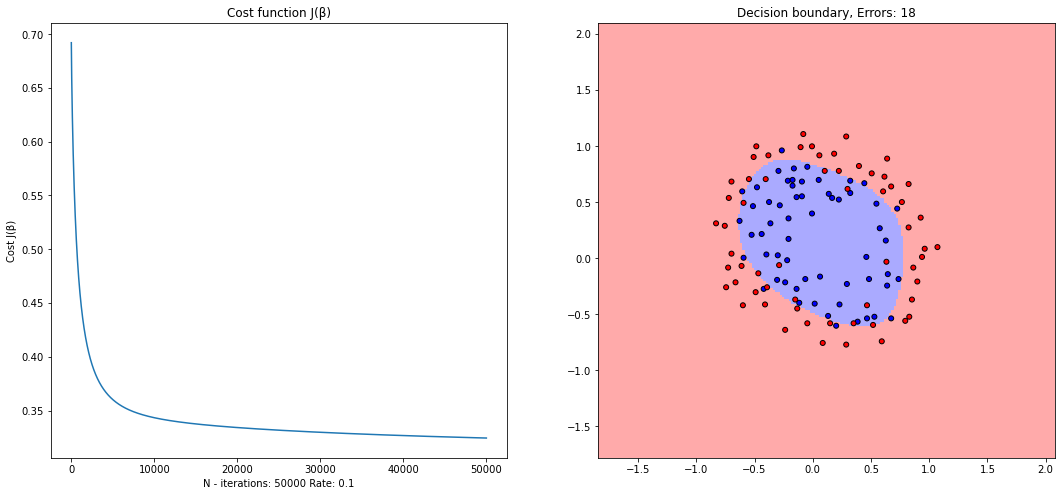

In [420]:
Xne = mapFeature(microchipsX1,microchipsX2,5)   # Create a polynominal degree five model.
Bj = np.zeros(len(Xne[0]))                      # Prepare Bj using  β = (0, 0, 0, 0, 0, 0).
costY = []                                      # Array holding cost for each iteration.

Bgradient = gradientDescent(Xne, microchipsY, Bj, N, alpha)       # Recieve B, created using gradient descent.
printResults(5)                                                   # Run degree 5 model.

Does the same thing as the previous exercise but now uses a degree 5 model.

The model is here set and a new Xne and Bj is here created and the graident descent reruns with the new values.